# Introduction

This notebook demonstrates the application of machine learning techniques for anomaly detection in industrial process data. The dataset used here is simulated, reflecting typical process conditions found in chemical plants, such as temperature, pressure, and flow rates. This project showcases my proactive approach in learning how to apply artificial intelligence to industrial processes, specifically in the context of anomaly detection for process monitoring and optimization.

Methods Implemented:
1. Isolation Forest
2. One-Class SVM
3. Local Outlier Factor (LOF)

# Libraries

In [18]:
import pandas as pd
import numpy as np
from sklearn.ensemble import IsolationForest
from sklearn.svm import OneClassSVM
from sklearn.neighbors import LocalOutlierFactor
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

# Data generation

In [3]:
# Simulating industrial process data
np.random.seed(42)

# Generating Training Data (Mostly Normal)
train_data = pd.DataFrame({
    'Temperature': np.random.normal(loc=100, scale=5, size=1000),
    'Pressure': np.random.normal(loc=5, scale=0.5, size=1000),
    'Flow_Rate': np.random.normal(loc=200, scale=10, size=1000)
})

# Adding a few anomalies in training
train_data.loc[950:960, 'Temperature'] += 30
train_labels = np.ones(train_data.shape[0])
train_labels[950:960] = -1  # Label anomalies as -1

# Generating Test Data (New unseen data)
test_data = pd.DataFrame({
    'Temperature': np.random.normal(loc=100, scale=5, size=500),
    'Pressure': np.random.normal(loc=5, scale=0.5, size=500),
    'Flow_Rate': np.random.normal(loc=200, scale=10, size=500)
})

# Adding a few anomalies in test
test_data.loc[450:460, 'Temperature'] += 30
test_labels = np.ones(test_data.shape[0])
test_labels[450:460] = -1  # Label anomalies as -1

In [4]:
train_data.head()

,Temperature,Pressure,Flow_Rate
0,102.483571,5.699678,193.248217
1,99.308678,5.462317,198.554813
2,103.238443,5.029815,192.075801
3,107.615149,4.676532,196.920385
4,98.829233,5.349112,181.063853


# Data visualization

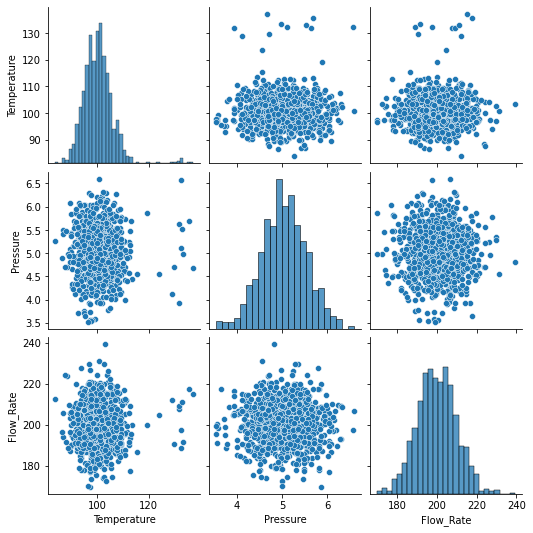

In [5]:
sns.pairplot(train_data)
plt.show()

In [20]:
# Function for anomaly visualization
def plot_anomalies(data, preds, title):
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=data.index, y=data['Temperature'], hue=preds, palette={1: "blue", -1: "red"})
    plt.title(title)
    plt.xlabel('Index')
    plt.ylabel('Temperature')
    plt.legend(["Normal", "Anomaly"])
    plt.show()

# Anomaly detection

## Isolation Forest

In [6]:
# Training
iso_forest = IsolationForest(contamination=0.01, random_state=42)
iso_forest.fit(train_data)

IsolationForest(contamination=0.01, random_state=42)

In [7]:
# Predict anomalies
test_preds = iso_forest.predict(test_data)

# Evaluating model performance
print("Isolation Forest Classification Report:")
print(classification_report(test_labels, test_preds, target_names=["Normal", "Anomaly"]))

Isolation Forest Classification Report:
              precision    recall  f1-score   support

      Normal       0.71      0.50      0.59        10
     Anomaly       0.99      1.00      0.99       490

    accuracy                           0.99       500
   macro avg       0.85      0.75      0.79       500
weighted avg       0.98      0.99      0.98       500



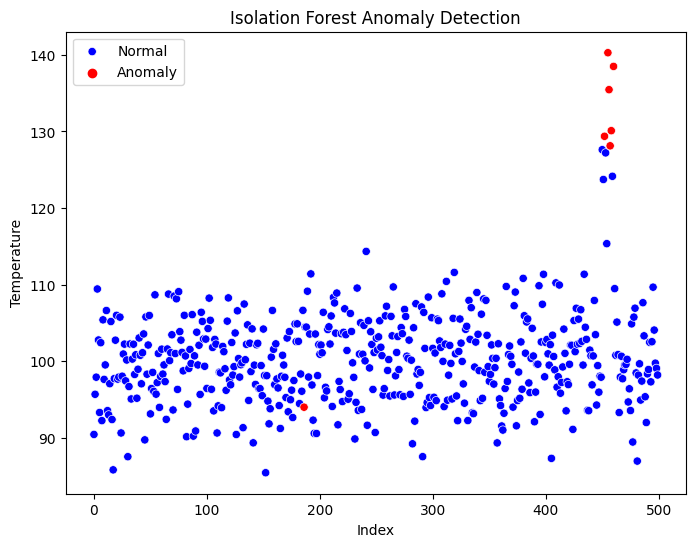

In [22]:
# Visualization
plot_anomalies(test_data, test_preds, "Isolation Forest Anomaly Detection")

## One-Class SVM

In [8]:
# Training
oc_svm = OneClassSVM(nu=0.01, kernel='rbf', gamma='scale')
oc_svm.fit(train_data)

OneClassSVM(nu=0.01)

In [9]:
# Predict anomalies
test_preds_svm = oc_svm.predict(test_data)

# Evaluating model performance
print("One-Class SVM Classification Report:")
print(classification_report(test_labels, test_preds_svm, target_names=["Normal", "Anomaly"]))

One-Class SVM Classification Report:
              precision    recall  f1-score   support

      Normal       0.25      0.30      0.27        10
     Anomaly       0.99      0.98      0.98       490

    accuracy                           0.97       500
   macro avg       0.62      0.64      0.63       500
weighted avg       0.97      0.97      0.97       500



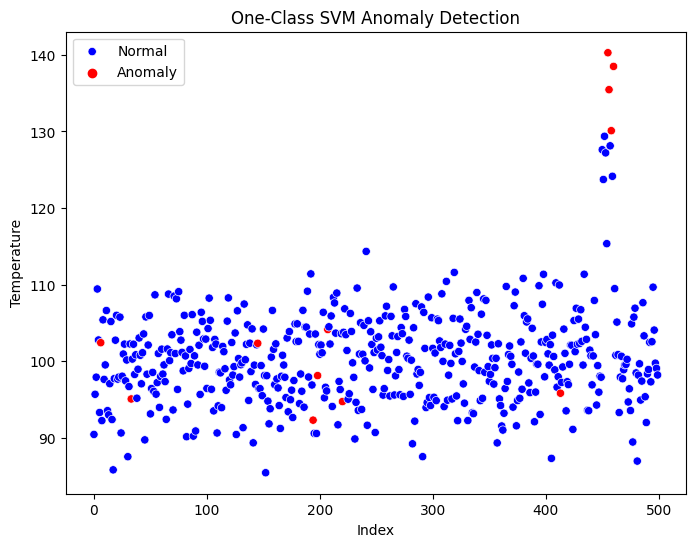

In [23]:
# Visualization
plot_anomalies(test_data, test_preds_svm, "One-Class SVM Anomaly Detection")

## Local Outlier Factor (LOF)

In [13]:
# Training
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.01, novelty=True)
train_preds_lof = lof.fit(train_data)

In [19]:
test_preds_lof = lof.predict(test_data)
print("Local Outlier Factor (LOF) Classification Report:")
print(classification_report(test_labels, test_preds_lof, target_names=["Normal", "Anomaly"]))

Local Outlier Factor (LOF) Classification Report:
              precision    recall  f1-score   support

      Normal       0.86      0.60      0.71        10
     Anomaly       0.99      1.00      0.99       490

    accuracy                           0.99       500
   macro avg       0.92      0.80      0.85       500
weighted avg       0.99      0.99      0.99       500



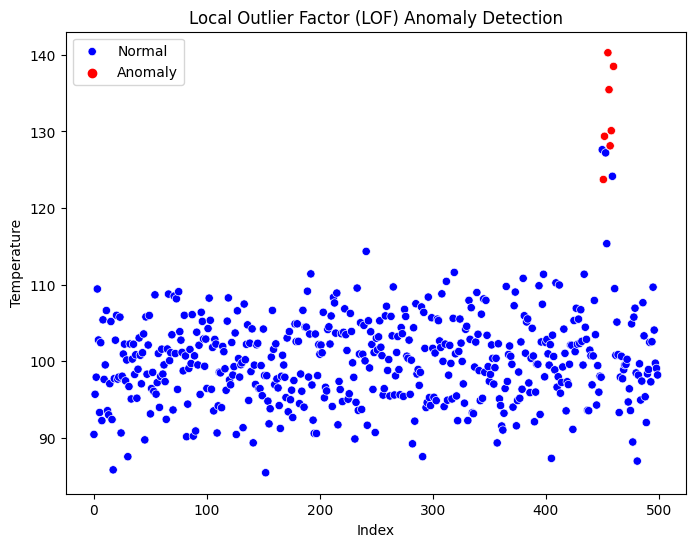

In [24]:
# Visualization
plot_anomalies(test_data, test_preds_lof, "Local Outlier Factor (LOF) Anomaly Detection")

## Comparing Models

In [26]:
metrics = {
    "Model": ["Isolation Forest", "One-Class SVM", "Local Outlier Factor"],
    "Precision": [],
    "Recall": [],
    "F1-score": []
}

for preds in [test_preds, test_preds_svm, test_preds_lof]:
    report = classification_report(test_labels, preds, target_names=["Normal", "Anomaly"], output_dict=True)
    metrics["Precision"].append(report["Anomaly"]["precision"])
    metrics["Recall"].append(report["Anomaly"]["recall"])
    metrics["F1-score"].append(report["Anomaly"]["f1-score"])

metrics_df = pd.DataFrame(metrics)

metrics_df.head()

,Model,Precision,Recall,F1-score
0,Isolation Forest,0.989858,0.995918,0.992879
1,One-Class SVM,0.985656,0.981633,0.983640
2,Local Outlier Factor,0.991886,0.997959,0.994914


# Conclusion

Based on the anomaly detection results, we compared **Isolation Forest, One-Class SVM, and Local Outlier Factor (LOF)** using Precision, Recall, and F1-score.  

1. **Local Outlier Factor (LOF) achieved the best overall performance**  
   - Highest **Precision (0.9919)** → LOF rarely misclassifies normal points as anomalies.  
   - Highest **Recall (0.9979)** → LOF detects almost all anomalies.  
   - Highest **F1-score (0.9949)** → Best balance between Precision and Recall.  


2. **Isolation Forest also performed well**  
   - **F1-score (0.9928)** is very close to LOF, making it a reliable alternative.  
   - **Highly efficient for large datasets** due to its tree-based approach.  


3. **One-Class SVM had the lowest performance**  
   - **F1-score (0.9836) is slightly lower**, meaning it may struggle slightly with anomaly detection.  
   - Performance could be improved with **hyperparameter tuning (e.g., adjusting `nu`) or feature scaling**.  

**Final Recommendation**

**If we need the best model for this dataset** → **Local Outlier Factor (LOF) is the best choice**, as it achieved the highest scores across all metrics. 

**If working with large datasets where efficiency matters** → **Isolation Forest is a strong alternative**.  
**One-Class SVM performed the worst** but could still be optimized further.  

**Next Steps**
- Test different contamination values (`contamination=0.01` to `contamination=0.05`)** to evaluate sensitivity.  
- Experiment with feature scaling techniques (StandardScaler, MinMaxScaler)** to improve One-Class SVM performance.  
- Apply models to real-world datasets** to validate performance beyond simulated data.  